In [ ]:


import pandas as pd

# Read CSV file
try:
  df_csv = pd.read_csv('/content/QVI_purchase_behaviour.csv')  # Replace 'your_csv_file.csv' with the actual file name
  print("CSV file contents:\n", df_csv)
except FileNotFoundError:
  print("Error: CSV file not found.")


# Read XLSX file
try:
  df_xlsx = pd.read_excel('/content/QVI_transaction_data.xlsx') # Replace 'your_excel_file.xlsx' with the actual file name
  print("\nXLSX file contents:\n", df_xlsx)
except FileNotFoundError:
  print("Error: XLSX file not found.")
except Exception as e:
  print(f"An error occurred while reading the XLSX file: {e}")


CSV file contents:
        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]

XLSX file contents:
          DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

import pandas as pd
import numpy as np

# Read CSV file
try:
    df_csv = pd.read_csv('/content/QVI_purchase_behaviour.csv')
except FileNotFoundError:
    print("Error: CSV file not found.")
    exit() # Exit if file not found


# Read XLSX file
try:
    df_xlsx = pd.read_excel('/content/QVI_transaction_data.xlsx')
except FileNotFoundError:
    print("Error: XLSX file not found.")
    exit() # Exit if file not found
except Exception as e:
    print(f"An error occurred while reading the XLSX file: {e}")
    exit()

# Data Cleaning and Consistency Checks

# 1. Check for missing values
print("\nMissing values in CSV:\n", df_csv.isnull().sum())
print("\nMissing values in XLSX:\n", df_xlsx.isnull().sum())

# Handle missing values (example: fill with mean for numeric columns)
for col in df_xlsx.select_dtypes(include=np.number):
    df_xlsx[col] = df_xlsx[col].fillna(df_xlsx[col].mean())

# 2. Check for inconsistencies (example: incorrect data types)
print("\nData types in CSV:\n", df_csv.dtypes)
print("\nData types in XLSX:\n", df_xlsx.dtypes)

# Convert data types if needed (example: convert to datetime)
# df_xlsx['DATE'] = pd.to_datetime(df_xlsx['DATE'])


# 3. Check for outliers (example: using IQR for numeric columns)
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[~((data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR)))]
    return outliers

# Example for a specific numeric column (replace 'column_name' with your column)
#outliers_xlsx = find_outliers_iqr(df_xlsx['column_name'])
#print("\nOutliers in XLSX (column_name):\n", outliers_xlsx)


# 4. Check for duplicates
print("\nNumber of duplicates in CSV:", df_csv.duplicated().sum())
print("\nNumber of duplicates in XLSX:", df_xlsx.duplicated().sum())


# Remove Duplicates
df_xlsx.drop_duplicates(inplace=True)


# 5. Check for consistent categories
# (Example: ensure consistent spellings or formats of category names)

# 6. Check Numeric Data
print("\nNumeric columns in CSV:\n", df_csv.select_dtypes(include=np.number).columns)
print("\nNumeric columns in XLSX:\n", df_xlsx.select_dtypes(include=np.number).columns)

# Save cleaned data
df_csv.to_csv('/content/cleaned_QVI_purchase_behaviour.csv', index=False)
df_xlsx.to_excel('/content/cleaned_QVI_transaction_data.xlsx', index=False)

print("\nCleaned data saved to new CSV and XLSX files.")



Missing values in CSV:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Missing values in XLSX:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Data types in CSV:
 LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

Data types in XLSX:
 DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Number of duplicates in CSV: 0

Number of duplicates in XLSX: 1

Numeric columns in CSV:
 Index(['LYLTY_CARD_NBR'], dtype='object')

Numeric columns in XLSX:
 Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES'],
      dtype='object')

Cleaned data saved to new CSV and XLSX files.


In [ ]:


import pandas as pd
import numpy as np

# Load the cleaned datasets
try:
    cleaned_csv = pd.read_csv('/content/cleaned_QVI_purchase_behaviour.csv')
    cleaned_xlsx = pd.read_excel('/content/cleaned_QVI_transaction_data.xlsx')
except FileNotFoundError:
    print("Error: Cleaned CSV or XLSX file not found. Please run the data cleaning script first.")
    exit()

# Identify a common column for merging (replace 'customer_id' with the actual column name)
# If there's no common column, you'll need to find a way to create one based on data
# If you are unsure, please clarify the files' content and common identifier
common_column = 'LYLTY_CARD_NBR'

if common_column not in cleaned_csv.columns or common_column not in cleaned_xlsx.columns:
    print(f"Error: Common column '{common_column}' not found in both datasets.")
    print("Please specify the correct column name or create a common column.")
    exit()

# Merge the datasets
try:
    merged_df = pd.merge(cleaned_csv, cleaned_xlsx, on=common_column, how='inner') # You can change 'inner' to 'outer', 'left', or 'right' as needed
except Exception as e:
    print(f"An error occurred during the merge operation: {e}")
    exit()

# Save the merged dataset
merged_df.to_csv('/content/merged_data.csv', index=False)
print("Merged data saved to merged_data.csv")


Merged data saved to merged_data.csv


Total Sales: $1934409.00

Sales by Customer Segment:
 PREMIUM_CUSTOMER
Budget        676211.55
Mainstream    750744.50
Premium       507452.95
Name: TOT_SALES, dtype: float64


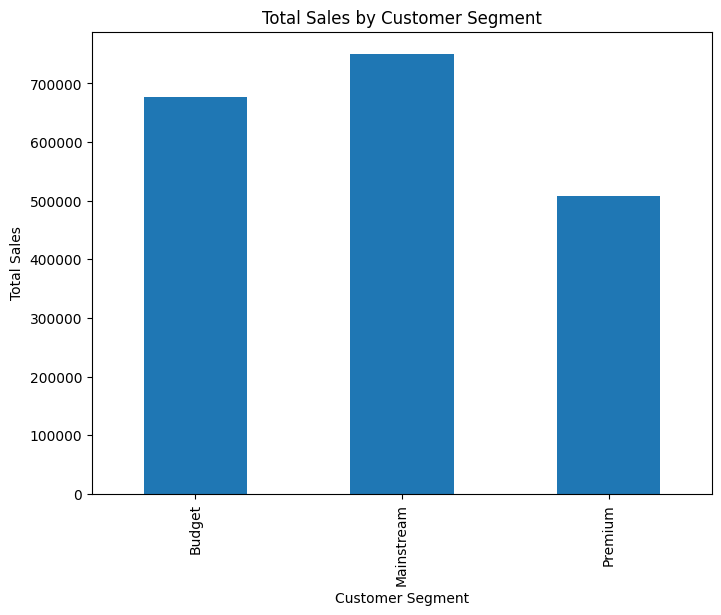

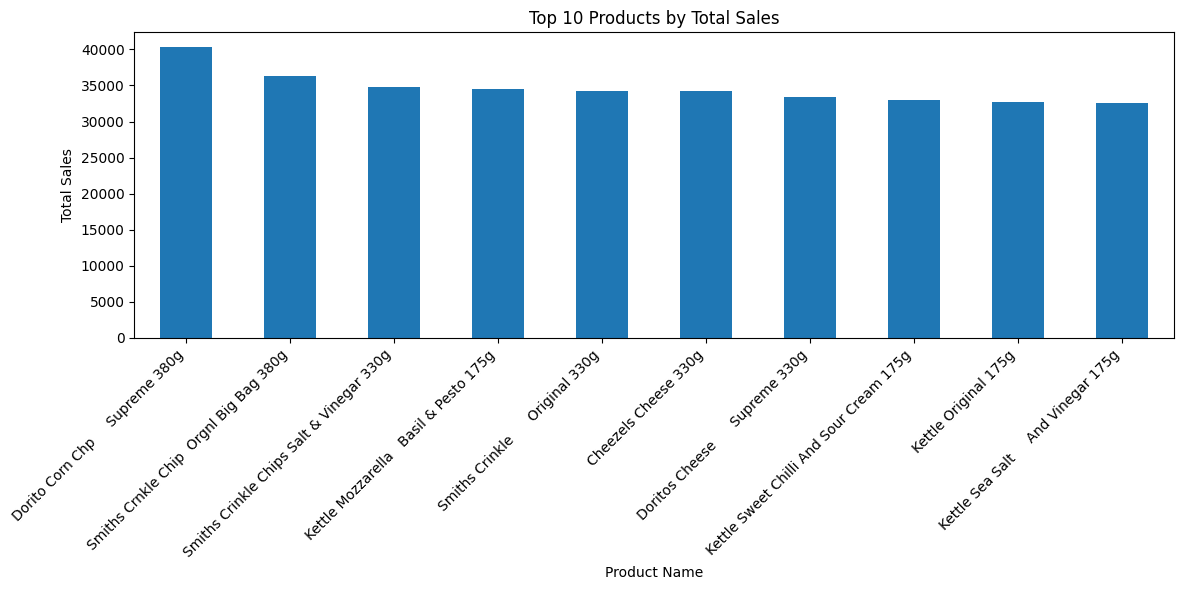

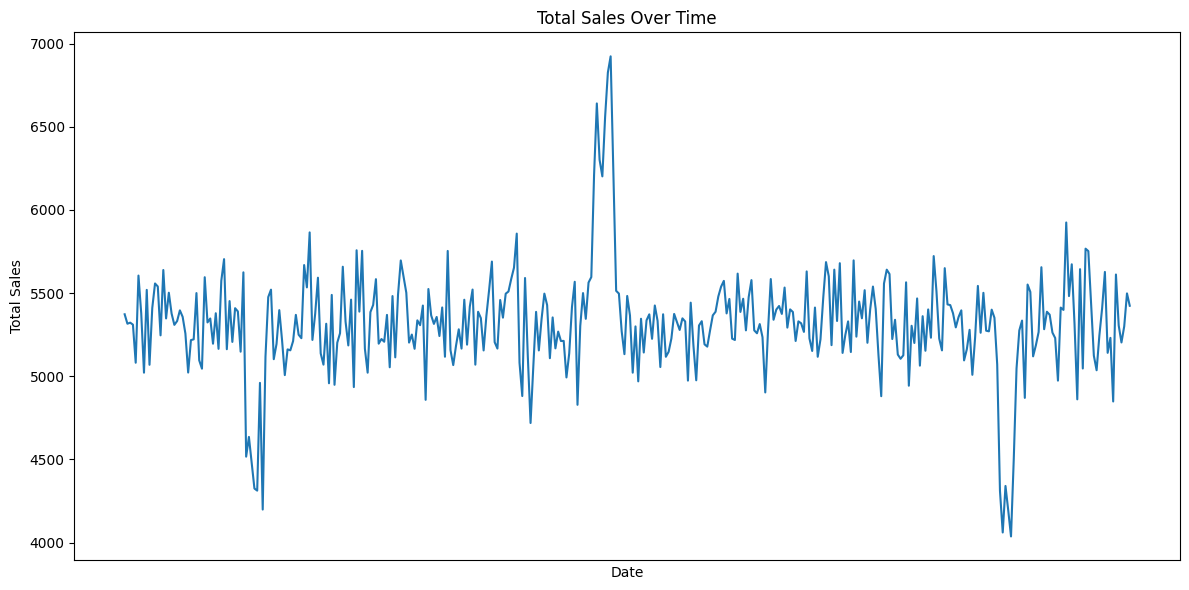


Average Transaction Value per Customer Segment:
 PREMIUM_CUSTOMER
Budget        7.258838
Mainstream    7.361106
Premium       7.281575
Name: TOT_SALES, dtype: float64


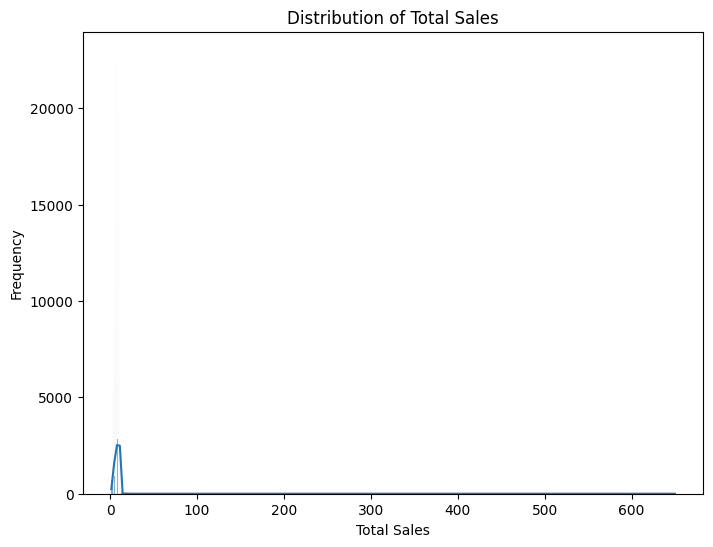

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
try:
    merged_df = pd.read_csv('/content/merged_data.csv')
except FileNotFoundError:
    print("Error: Merged data file not found. Please run the data merging script first.")
    exit()

# 1. Total Sales Analysis
total_sales = merged_df['TOT_SALES'].sum()
print(f"Total Sales: ${total_sales:.2f}")

# 2. Sales by Customer Segment
# Assuming 'PREMIUM CUSTOMER' is a relevant column
sales_by_segment = merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
print("\nSales by Customer Segment:\n", sales_by_segment)

plt.figure(figsize=(8, 6))
sales_by_segment.plot(kind='bar')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()


# 3. Sales by Product (assuming 'PROD_NAME' exists)
if 'PROD_NAME' in merged_df.columns:
    sales_by_product = merged_df.groupby('PROD_NAME')['TOT_SALES'].sum().nlargest(10) # Top 10 products
    plt.figure(figsize=(12, 6))
    sales_by_product.plot(kind='bar')
    plt.title('Top 10 Products by Total Sales')
    plt.xlabel('Product Name')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'PROD_NAME' column not found. Cannot analyze sales by product.")


# 4. Sales over Time (assuming 'DATE' column is datetime)
if 'DATE' in merged_df.columns:
    merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
    sales_over_time = merged_df.groupby('DATE')['TOT_SALES'].sum()

    plt.figure(figsize=(12, 6))
    plt.plot(sales_over_time.index, sales_over_time.values)
    plt.title('Total Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Warning: 'DATE' column not found or not in datetime format. Cannot analyze sales over time.")


# 5.  Average transaction value per customer segment
avg_transaction = merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean()
print("\nAverage Transaction Value per Customer Segment:\n", avg_transaction)


# 6. Explore other relevant metrics (e.g., units sold, discounts, etc.)


# Distribution of total sales
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['TOT_SALES'], kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


In [ ]:


# Customer Segmentation and Recommendations

#  Analyze customer segments based on 'PREMIUM_CUSTOMER' and other relevant factors
#  (e.g., purchase frequency, average transaction value, product preferences)

# Example:  Segment customers based on 'PREMIUM_CUSTOMER' and total sales
segments = merged_df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].agg(['sum', 'mean', 'count'])
print("\nCustomer Segments:\n", segments)

# Recommendations on segments to target:
# 1. High-value customers: Focus on premium customer segment and retention strategies.
# 2. Growth potential: Target customers with medium total sales but high frequency or potential for upselling.
# 3. Low-value customers: these customers can be converted to higher spending segments through promotions.


# Packet Size Analysis
if 'PROD_QTY' in merged_df.columns:
    print("\nAnalyzing Packet Sizes:")
    # Analyze 'PROD_QTY' for each segment. If packet size is relevant, explore relationships
    packet_analysis = merged_df.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].agg(['mean', 'std', 'min', 'max'])
    print(packet_analysis)

    # Consider if packet sizes are relative to customer spending habits within each segment
    # Example: Are premium customers buying larger packets on average?

    # Add more in-depth analysis based on relationships between 'PROD_QTY' and other variables
else:
    print("Warning: 'PROD_QTY' column not found. Cannot analyze packet sizes.")

# Overall Conclusion

# Based on the analysis, provide concise recommendations tailored to the specific customer segments:
# - Focus on premium customers by offering loyalty programs and exclusive deals.
# - Design targeted promotions and product bundles for other segments to increase sales.
# - Explore packet sizes to see any relationships, and develop strategies to increase average order value.
# - Consider offering smaller packet sizes to lower value customers as an entry point to potentially convert them.

# Recommendations/Insights
if segments['sum']['Premium'] > segments['sum']['Budget']:
  print("Premium Customer segment is contributing most to the revenue, focus on customer retention initiatives for this segment.")

if segments['mean']['Budget'] < 20 : # Example Threshold
  print("Budget customers exhibit lower average spending. Explore targeted promotions or product bundling strategies to encourage higher spending.")





Customer Segments:
                         sum      mean   count
PREMIUM_CUSTOMER                             
Budget            676211.55  7.258838   93157
Mainstream        750744.50  7.361106  101988
Premium           507452.95  7.281575   69690

Analyzing Packet Sizes:
                      mean       std  min  max
PREMIUM_CUSTOMER                              
Budget            1.909658  0.339508    1    5
Mainstream        1.901841  0.345644    1    5
Premium           1.912168  1.115979    1  200
Budget customers exhibit lower average spending. Explore targeted promotions or product bundling strategies to encourage higher spending.



Total Spend per Customer:
 LYLTY_CARD_NBR
1000    6.0
1002    2.7
1003    6.6
1004    1.9
1005    2.8
Name: TOT_SALES, dtype: float64

Average Transaction Value per Customer:
 LYLTY_CARD_NBR
1000    6.0
1002    2.7
1003    3.3
1004    1.9
1005    2.8
Name: TOT_SALES, dtype: float64

Purchase Frequency per Customer:
 LYLTY_CARD_NBR
1000    1
1002    1
1003    2
1004    1
1005    1
Name: DATE, dtype: int64

Average Quantity per Transaction:
 LYLTY_CARD_NBR
1000    2.0
1002    1.0
1003    1.0
1004    1.0
1005    1.0
Name: PROD_QTY, dtype: float64

Customer Recency (Days since last purchase):
 LYLTY_CARD_NBR
1000    0
1002    0
1003    0
1004    0
1005    0
Name: DATE, dtype: int64

Brand Preference by Customer Segment:
 Brand_Name        Burger     CCs  Cheetos  Cheezels     Cobs    Dorito  \
PREMIUM_CUSTOMER                                                         
Budget            2527.7  6657.0   6071.6   13983.9  23780.4  13068.25   
Mainstream        2392.0  6507.9   6374.1   15303.

<Figure size 1000x600 with 0 Axes>

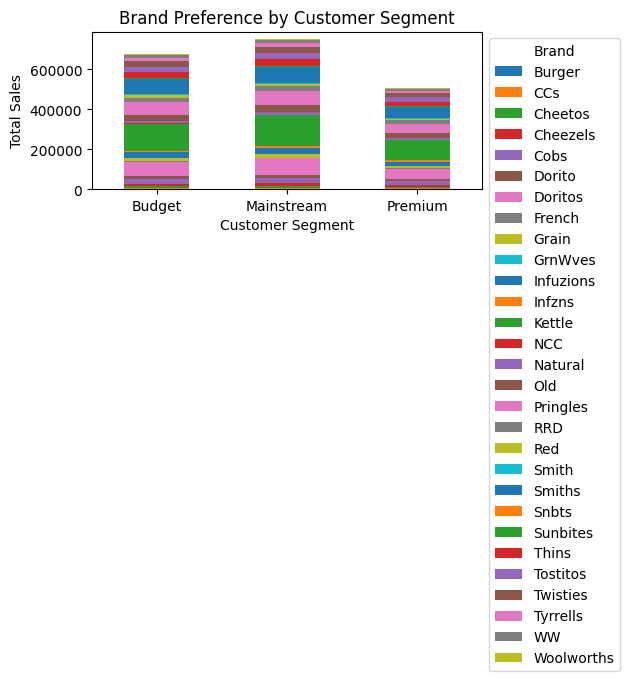

In [ ]:

# Enhanced Customer Purchasing Behavior Metrics

# 1. Total Spend per Customer:
customer_total_spend = merged_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()
print("\nTotal Spend per Customer:\n", customer_total_spend.head())

# 2. Average Transaction Value (ATV) per Customer:
customer_atv = merged_df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean()
print("\nAverage Transaction Value per Customer:\n", customer_atv.head())


# 3. Purchase Frequency per Customer:
customer_purchase_freq = merged_df.groupby('LYLTY_CARD_NBR')['DATE'].count()  # Assuming 'DATE' represents transaction date
print("\nPurchase Frequency per Customer:\n", customer_purchase_freq.head())


# 4. Average Quantity per Transaction
customer_avg_quantity = merged_df.groupby('LYLTY_CARD_NBR')['PROD_QTY'].mean()
print("\nAverage Quantity per Transaction:\n", customer_avg_quantity.head())

# 5. Recency (Days since last purchase) - Requires date information
# Assuming 'DATE' is a datetime column
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])
max_date = merged_df['DATE'].max()
customer_recency = merged_df.groupby('LYLTY_CARD_NBR')['DATE'].max().apply(lambda x: (max_date - x).days)
print("\nCustomer Recency (Days since last purchase):\n", customer_recency.head())


# Derive Features: Pack Size and Brand Name (example - adjust based on your data)

# Assuming 'PROD_NAME' contains information about pack size and brand
merged_df['Pack_Size'] = merged_df['PROD_NAME'].str.extract('(\d+g|\d+ml)', expand=False)
merged_df['Brand_Name'] = merged_df['PROD_NAME'].str.split(' ').str[0] # Extracts the first word


# Metrics of Interest for Customer Segments (Examples):
# * Average spend per pack size within each segment
# * Brand preference within each segment
# * Purchase frequency for specific brands or pack sizes
# * Impact of promotions or discounts on purchase behavior


# Example analysis using derived features:
brand_preference = merged_df.groupby(['PREMIUM_CUSTOMER', 'Brand_Name'])['TOT_SALES'].sum().unstack()
print("\nBrand Preference by Customer Segment:\n", brand_preference.head())

# Add more visualizations
plt.figure(figsize=(10, 6))
brand_preference.plot(kind='bar', stacked=True)
plt.title('Brand Preference by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.legend(title='Brand', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


